In [1]:
import numpy as np
import keras
import pandas as pd
import joblib
from keras import Sequential
from first_test import EVENT_DICT
import first_test
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

2025-07-31 16:35:07.744623: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-31 16:35:07.818650: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-31 16:35:08.620309: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-31 16:35:08.940162: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754001309.280396   22200 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754001309.37

In [2]:
"""dev_x = np.load('dwt_najafi/dev_naj_x.npy', allow_pickle=True)
dev_y = np.load('dwt_najafi/dev_naj_y.npy', allow_pickle=True)
eval_x = np.load('dwt_najafi/eval_naj_x.npy', allow_pickle=True)
eval_y = np.load('dwt_najafi/eval_naj_y.npy', allow_pickle=True)
train_x = np.load('dwt_najafi/train_naj_x.npy', allow_pickle=True)
train_y = np.load('dwt_najafi/train_naj_y.npy', allow_pickle=True)"""

"dev_x = np.load('dwt_najafi/dev_naj_x.npy', allow_pickle=True)\ndev_y = np.load('dwt_najafi/dev_naj_y.npy', allow_pickle=True)\neval_x = np.load('dwt_najafi/eval_naj_x.npy', allow_pickle=True)\neval_y = np.load('dwt_najafi/eval_naj_y.npy', allow_pickle=True)\ntrain_x = np.load('dwt_najafi/train_naj_x.npy', allow_pickle=True)\ntrain_y = np.load('dwt_najafi/train_naj_y.npy', allow_pickle=True)"

In [ ]:
dev_x = np.load('wpd/without_ar/dev_x.npy', allow_pickle=True)
dev_y = np.load('wpd/without_ar/dev_y.npy', allow_pickle=True)
eval_x = np.load('wpd/without_ar/eval_x.npy', allow_pickle=True)
eval_y = np.load('wpd/without_ar/eval_y.npy', allow_pickle=True)
train_x = np.load('wpd/without_ar/train_x.npy', allow_pickle=True)
train_y = np.load('wpd/without_ar/train_y.npy', allow_pickle=True)

In [4]:
print(dev_y)
print(train_x.shape)

['bckg' 'bckg' 'bckg' ... 'fnsz' 'fnsz' 'fnsz']
(536404, 2464)


In [5]:
print(dev_x.shape)
print(eval_x.shape)

(79756, 2464)
(25132, 2464)


In [6]:
dev_x_tensor = tf.convert_to_tensor(dev_x)
train_x_tensor = tf.convert_to_tensor(train_x)
eval_x_tensor = tf.convert_to_tensor(eval_x)

E0000 00:00:1753994906.608276   16595 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1753994906.610045   16595 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [11]:
def change_labels_to_number(array):
    new_array = []
    for item in array:
        new_array.append(EVENT_DICT[item])
    return new_array

In [12]:
dev_y = change_labels_to_number(dev_y)
train_y = change_labels_to_number(train_y)
eval_y = change_labels_to_number(eval_y)

In [7]:
"""dev_y.apply(lambda x: EVENT_DICT[x])
eval_y.apply(lambda x: EVENT_DICT[x])
train_y.apply(lambda x: EVENT_DICT[x])"""

'dev_y.apply(lambda x: EVENT_DICT[x])\neval_y.apply(lambda x: EVENT_DICT[x])\ntrain_y.apply(lambda x: EVENT_DICT[x])'

In [20]:
train_x[0].shape

(2464,)

In [13]:
def create_model():
    model = keras.models.Sequential([
        keras.Input(shape=(22,40)),
        keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.MaxPooling1D(pool_size=2),
        keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Conv1D(filters=64, kernel_size=1, activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Bidirectional(keras.layers.LSTM(200, return_sequences=True, dropout=0.2093)),
        keras.layers.Bidirectional(keras.layers.LSTM(200, return_sequences=True, dropout=0.2093)),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.GlobalAveragePooling1D(),
        keras.layers.Dense(12, activation='softmax')
    ])
    return model
model_cnn = create_model()
model_cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 22, 64)         │         7,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 11, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 11, 64)         │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 11, 64)         │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 11, 400)        │       424,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 11, 400)        │       961,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 11, 512)        │       205,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 12)             │         6,156 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,617,228 (6.17 MB)

 Trainable params: 1,617,228 (6.17 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model_cnn.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, ema_momentum=0.95), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
model_cnn.fit(train_x_tensor, train_y, epochs=20, validation_data=(eval_x_tensor, eval_y), verbose=2)

ValueError: Unrecognized data type: x=[[ 4.69192648e+00  3.39433660e+01  1.15215210e+03 ...  7.75436747e-01
  -1.27848451e+00  1.39205082e+00]
 [-2.12095555e+00  4.72175352e+01  2.22949563e+03 ... -2.26745701e+00
  -2.44099334e+00  1.15372739e+00]
 [ 1.14473591e+01  3.74347894e+01  1.40136346e+03 ... -1.60139368e+00
  -1.27847230e+00  6.75759885e-01]
 ...
 [ 7.98841530e+01  7.12171142e+01  5.07187735e+03 ... -2.38033682e-01
  -2.73296140e+00  2.59112270e+00]
 [ 4.54679175e+01  7.86556916e+01  6.18671782e+03 ... -4.17492409e-01
  -2.79277800e+00  2.08638020e+00]
 [ 1.03448053e+02  7.42852113e+01  5.51829262e+03 ...  2.37140910e-01
  -2.16468993e+00  2.01087557e+00]] (of type <class 'tensorflow.python.framework.ops.EagerTensor'>)

In [16]:
def create_naj_model():
    model = Sequential([
        keras.Input(shape=(22, 40)),
        keras.layers.Bidirectional(keras.layers.LSTM(200, return_sequences=True)),
        #keras.layers.Bidirectional(keras.layers.LSTM(200, return_sequences=True)),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dense(200, activation='relu'),
        keras.layers.GlobalAveragePooling1D(),
        keras.layers.Dense(12, activation='softmax'),
    ])
    return model
model = create_naj_model()
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_4 (Bidirectional) │ (None, 22, 400)        │       385,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 22, 512)        │       205,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 22, 200)        │       102,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_2      │ (None, 200)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 12)             │         2,412 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 695,924 (2.65 MB)

 Trainable params: 695,924 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.fit(train_x_tensor, train_y, epochs=100, batch_size=150, validation_data=(eval_x_tensor, eval_y), verbose=2)

ValueError: Unrecognized data type: x=[[ 4.69192648e+00  3.39433660e+01  1.15215210e+03 ...  7.75436747e-01
  -1.27848451e+00  1.39205082e+00]
 [-2.12095555e+00  4.72175352e+01  2.22949563e+03 ... -2.26745701e+00
  -2.44099334e+00  1.15372739e+00]
 [ 1.14473591e+01  3.74347894e+01  1.40136346e+03 ... -1.60139368e+00
  -1.27847230e+00  6.75759885e-01]
 ...
 [ 7.98841530e+01  7.12171142e+01  5.07187735e+03 ... -2.38033682e-01
  -2.73296140e+00  2.59112270e+00]
 [ 4.54679175e+01  7.86556916e+01  6.18671782e+03 ... -4.17492409e-01
  -2.79277800e+00  2.08638020e+00]
 [ 1.03448053e+02  7.42852113e+01  5.51829262e+03 ...  2.37140910e-01
  -2.16468993e+00  2.01087557e+00]] (of type <class 'tensorflow.python.framework.ops.EagerTensor'>)

In [11]:
cnn_pred = model_cnn.predict(dev_x_tensor)
pred = model.predict(dev_x_tensor)

260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [15]:
report_cnn = model_cnn.evaluate(dev_x_tensor, dev_y)

260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0436 - loss: 2.7283


In [12]:
report = model.evaluate(dev_x_tensor, dev_y)

260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2070 - loss: 11.5309


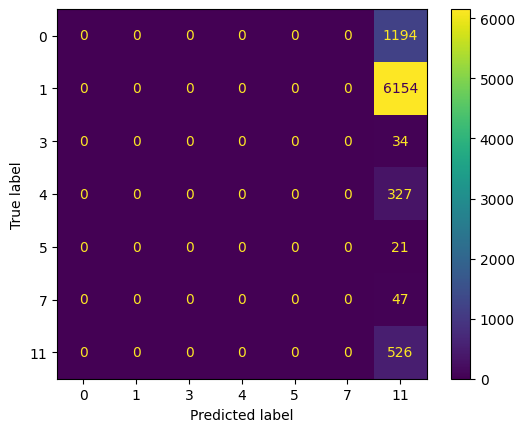

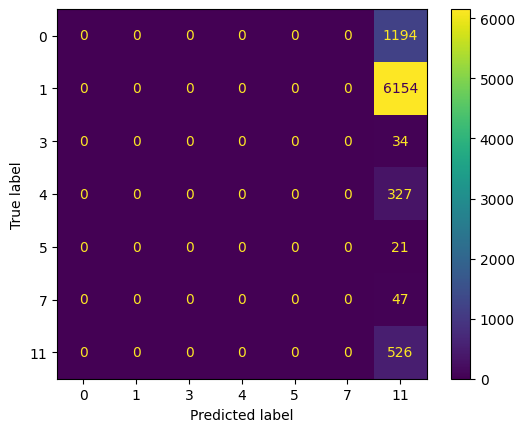

In [24]:
disp = ConfusionMatrixDisplay.from_predictions(dev_y, cnn_pred.argmax(axis=1))
disp.plot()

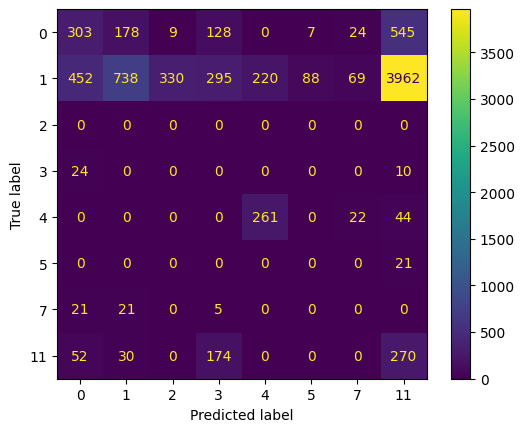

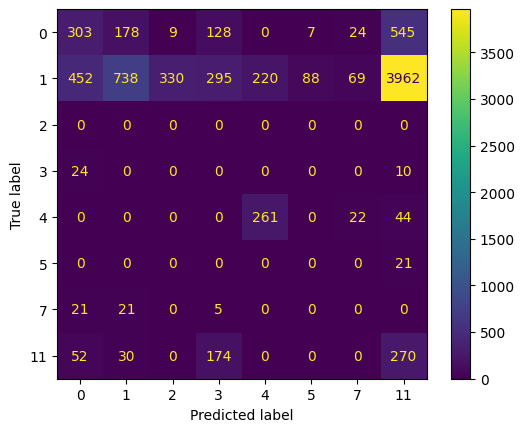

In [13]:
disp = ConfusionMatrixDisplay.from_predictions(dev_y, pred.argmax(axis=1))
disp.plot()